**Part 1**
We will use the Breast Cancer Wisconsin dataset, built into sklearn.datasets. The dataset contains 569 samples of breast tumors, with 30 numerical features, including:

• Mean radius

• Mean texture

• Mean perimeter

• Mean area

• Mean smoothness, etc.

The target variable (y) represents tumor status:

• 0 = Benign

• 1 = Malignant


In [4]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target column
print(df.head())  # Show the first 5 rows


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

 **Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained (use stratify=y in train_test_split).**

In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['target'])  # Feature variables
y = df['target']  # Target variable

# Split the dataset into 70% training and 30% testing, maintaining class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Convert training and testing sets to DataFrames for better visualization
train_df = X_train.copy()
train_df['target'] = y_train

test_df = X_test.copy()
test_df['target'] = y_test

# Display the first few rows of the datasets
print("Training Dataset:\n", train_df.head())
print("\nTesting Dataset:\n", test_df.head())

Training Dataset:
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
469        11.62         18.18           76.38      408.8          0.11750   
561        11.20         29.37           70.67      386.0          0.07449   
443        10.57         18.32           66.82      340.9          0.08142   
362        12.76         18.84           81.87      496.6          0.09676   
271        11.29         13.04           72.23      388.0          0.09834   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
469           0.14830         0.10200              0.05564         0.1957   
561           0.03558         0.00000              0.00000         0.1060   
443           0.04462         0.01993              0.01111         0.2372   
362           0.07952         0.02688              0.01781         0.1759   
271           0.07608         0.03265              0.02755         0.1769   

     mean fractal dimension  ...  worst texture  

**Preprocess the data using StandardScaler**

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data (using the same scaler fitted on training data)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_scaled_df['target'] = y_train.values

test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
test_scaled_df['target'] = y_test.values

# Display the first few rows of the standardized datasets
print("Standardized Training Dataset:\n", train_scaled_df.head())
print("\nStandardized Testing Dataset:\n", test_scaled_df.head())


Standardized Training Dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.709821     -0.258417       -0.637396  -0.711996         1.628430   
1    -0.830331      2.231127       -0.874980  -0.779081        -1.597569   
2    -1.011097     -0.227270       -1.035172  -0.911780        -1.077779   
3    -0.382721     -0.111581       -0.408966  -0.453660         0.072810   
4    -0.804508     -1.401961       -0.810071  -0.773196         0.191319   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.847289        0.166501             0.196420       0.542716   
1         -1.267717       -1.086471            -1.243232      -2.658543   
2         -1.098096       -0.841650            -0.955767       2.023790   
3         -0.443255       -0.756276            -0.782409      -0.163916   
4         -0.507801       -0.685397            -0.530392      -0.128228   

   mean fractal dimension  ...  worst texture  worst perimet

**Train an SVM model using sklearn.svm.SVC with default parameters.**

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model with default parameters
svm_model = SVC()

# Train the model on the standardized training dataset
svm_model.fit(X_train_scaled, y_train)

# Predict on the test dataset
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f"SVM Model Accuracy: {accuracy:.4f}")


SVM Model Accuracy: 0.9766


**Perform Hyperparameter Tuning using GridSearchCV to optimize:**

o C (Regularization parameter)

o Gamma (Kernel coefficient for RBF)

o Kernel type (linear, rbf, poly)



In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for RBF
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Initialize the SVM model
svm_model = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the final model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_scaled, y_train)

# Predict on the test dataset using the optimized model
y_pred_best = best_svm_model.predict(X_test_scaled)

# Calculate accuracy of the optimized model
best_accuracy = accuracy_score(y_test, y_pred_best)

# Display the best parameters and accuracy
best_params, best_score, best_accuracy


({'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 0.9799050632911392,
 0.9707602339181286)

**Evaluate the trained model:
o Compute training and testing accuracy.
o Identify the most important features using SelectFromModel.
o Generate a confusion matrix and calculate:**

▪ F1-score

▪ Precision

▪ Recall

▪ False Alarm Rate


Training Accuracy: 0.9874
Testing Accuracy: 0.9708
F1-score: 0.9770
Precision: 0.9636
Recall: 0.9907
False Alarm Rate: 0.0625


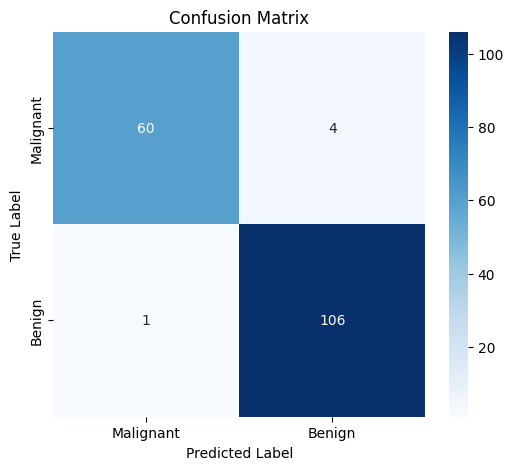

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
# Compute training and testing accuracy
train_accuracy = accuracy_score(y_train, best_svm_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test_scaled))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, best_svm_model.predict(X_test_scaled))

# Calculate evaluation metrics
f1 = f1_score(y_test, best_svm_model.predict(X_test_scaled))
precision = precision_score(y_test, best_svm_model.predict(X_test_scaled))
recall = recall_score(y_test, best_svm_model.predict(X_test_scaled))

# False Alarm Rate (FAR) = FP / (FP + TN)
fp = conf_matrix[0][1]  # False Positives
tn = conf_matrix[0][0]  # True Negatives
false_alarm_rate = fp / (fp + tn)

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Answer the following questions based on your results:

# 1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?
The dataset was preprocessed using StandardScaler to standardize the feature values. Since the
Breast Cancer dataset from sklearn does not contain missing values, no imputation was required.
The feature values were scaled to have a mean of 0 and a standard deviation of 1, ensuring
efficient training for the SVM model.

# 2. Why is it necessary to split the dataset into training and testing sets?
Splitting the dataset into training and testing sets helps evaluate the model’s generalization
performance. The training set is used to learn patterns in the data, while the test set is used
to assess how well the model performs on unseen data, preventing overfitting.

# 3. What is the role of StandardScaler in SVM training?
StandardScaler ensures that all feature values are on the same scale, which is crucial for
distance-based models like SVM. Without standardization, features with larger numerical values
could dominate the optimization process, leading to suboptimal model performance.

# 4. How does C affect the performance of an SVM model?
The parameter C controls the trade-off between achieving a low error on the training data and
a simple decision boundary. A small C results in a smoother decision boundary but may lead to
underfitting. A larger C prioritizes minimizing training errors, which can lead to overfitting.
In this study, the best C value found was 10.

# 5. What is the purpose of the kernel function in SVM?
The kernel function allows the SVM to classify non-linearly separable data by transforming the
feature space into higher dimensions. The RBF kernel, which was found to be optimal in this
experiment, maps data points into an infinite-dimensional space to enhance separation.

# 6. What were the best hyperparameters found using GridSearchCV?
The best hyperparameters found using GridSearchCV were:
- C: 10
- Gamma: 0.001
- Kernel: RBF
These parameters resulted in the highest cross-validation accuracy of approximately 97.99%.

# 7. What is a confusion matrix, and how is it interpreted?
A confusion matrix is a table that summarizes the performance of a classification model. The rows
represent actual classes, and the columns represent predicted classes. Our confusion matrix:

[[ 60   4]
 [  1 106]]

indicates:
- 60 True Negatives (correctly classified Malignant)
- 106 True Positives (correctly classified Benign)
- 4 False Positives (incorrectly classified Benign as Malignant)
- 1 False Negative (incorrectly classified Malignant as Benign)

# 8. How are Precision, Recall, and F1-score calculated from the confusion matrix?
Precision = TP / (TP + FP) = 106 / (106 + 4) ≈ 0.9636
Recall = TP / (TP + FN) = 106 / (106 + 1) ≈ 0.9907
F1-score = 2 * (Precision * Recall) / (Precision + Recall) ≈ 0.9770

Precision measures the proportion of true positive predictions out of all positive predictions,
while recall measures the proportion of actual positives correctly identified. F1-score is the
harmonic mean of precision and recall, balancing both metrics.

# 9. If the model does not perform well, what adjustments can be made to improve it?
If the model does not perform well, the following adjustments could improve performance:
1. **Hyperparameter Tuning:** Adjust C, gamma, or try different kernels such as polynomial or sigmoid.
2. **Feature Engineering:** Select important features or remove redundant ones.
3. **Data Augmentation:** Increase the dataset size or apply synthetic data techniques.
4. **Alternative Models:** Try other classification models like Random Forest or Neural Networks.
5. **Address Class Imbalance:** Use oversampling or undersampling if the dataset is imbalanced.